<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

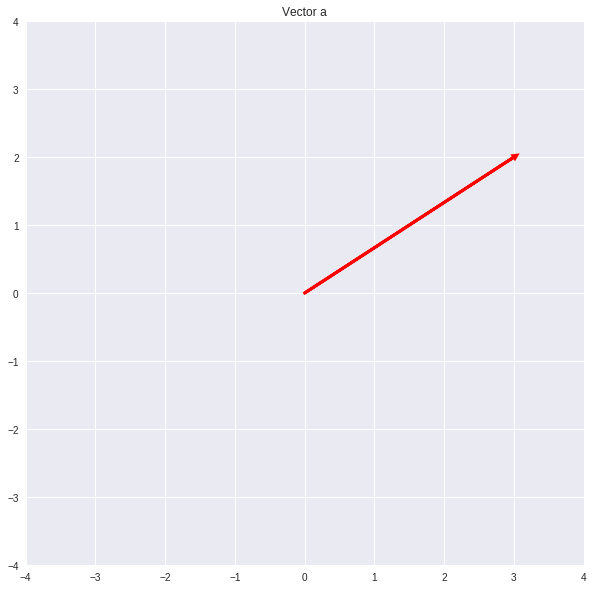

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set vector a using numpy
a = np.array([3,2])

# Plot vector using arrow in matplotlib
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.arrow(0,0,a[0],a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
ax.set_title("Vector a")
ax.set_xlim([-4.0, 4.0])
ax.set_ylim([-4.0, 4.0])
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
# Set b vector in numpy
b = np.array([17,-4,-2,1])

# Print length/norm of vector
print("||b|| : {:.3f}".format(np.linalg.norm(b)))

# Self-check
total = 0.0
for i in range(b.shape[0]):
  total += b[i]**2
print("sqrt of sum of square components : {:.3f}".format(total**0.5))

# Meaning of vector norm
print("**Norm of a vector represents the length of the vector.**")

||b|| : 17.607
sqrt of sum of square components : 17.607
**Norm of a vector represents the length of the vector.**


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
# Set vectors c & d
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

# Output numpy dot product
print("c dot d : {:.3f}".format(np.dot(c,d)))

c dot d : 42.000


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
# Set matrix E
E = np.matrix("7 4 2; 1 3 -1; 2 6 -4")

# Calculate and output inverse of E
print("E^-1:")
print(np.linalg.inv(E))
print()

# Calculate and output transpose of E
print("E^T:")
print(E.T)

E^-1:
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

E^T:
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [5]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [6]:
# Calculate and output mean, std dev, and variance for customers and snow columns using pandas functions
print("customers")
print("\tmean: {: 8.3f}\t\tstd dev: {: 8.3f}\tvariance: {: 10.3f}".format(df["customers"].mean(), df["customers"].std(), df["customers"].var()))
print()
print("snow")
print("\tmean: {: 8.3f}\t\tstd dev: {: 8.3f}\tvariance: {: 10.3f}".format(df["snow"].mean(), df["snow"].std(), df["snow"].var()))

customers
	mean:  1135.714		std dev:  314.264	variance:  98761.905

snow
	mean:    2.714		std dev:    2.928	variance:      8.571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [7]:
# Import stats module from scipy
import scipy.stats as stats

# Calculates Levene test of customers/snow (tests if samples are of equal variance)
out = stats.levene(customers, snow, center='mean')

# Output print
if out[1] < 0.05:
  print("As pvalue of Levene test is less than 0.05 ({:.4f}), meaning it is significant.\nCustomers and snow have similar variance.".format(out[1]))
else:
  print("As pvalue of Levene test is greater than 0.05 ({:.4f}), meaning it is not significant.\nCustomers and snow do not have similar variance.".format(out[1]))

As pvalue of Levene test is less than 0.05 (0.0008), meaning it is significant.
Customers and snow have similar variance.


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
# Output covariance using numpy cov function
print(np.cov(np.array([df["customers"], df["snow"]])))

[[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [10]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [11]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [12]:
# Import scale function from scikit learning prepocessing module
from sklearn.preprocessing import scale

# scale with no other inputs creates data scaled and shifted so that mean is 0.0 and std dev is 1.0
X_norm = scale(numpy_X)

# Output scaled data
print(X_norm)
print()

# Check means and std dev of each column using transposed matrix
for i in range(X_norm.T.shape[0]):
  print("{: 3d}:\tmean: {: 4.2f}; std dev: {: 4.2f}".format(i, X_norm.T[i].mean(), X_norm.T[i].std()))

[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]]

  0:	mean:  0.00; std dev:  1.00
  1:	mean: -0.00; std dev:  1.00
  2:	mean:  0.00; std dev:  1.00
  3:	mean:  0.00; std dev:  1.00
  4:	mean:  0.00; std 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

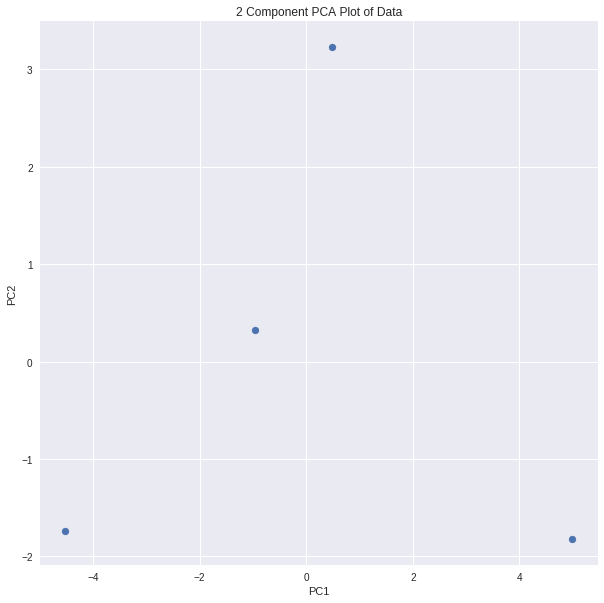

In [13]:
# Import PCA class from scikit learn decomposition module
from sklearn.decomposition import PCA

# Set-up for two component PCA
pca = PCA(2)

# Fit PCA to scaled data
pca.fit(X_norm)

# Transform each row of data to Principal Components
vals = pca.transform(X_norm)

# Show scatterplot of PCA using matplotlib
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.scatter(vals.T[0], vals.T[1])
ax.set_title("2 Component PCA Plot of Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [14]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [15]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

   1 Cluster(s) Inertia:  400.0000
		Centers:
		      1:   0.0000	 -0.0000


   2 Cluster(s) Inertia:  161.8688
		Centers:
		      1:   1.5092	 -0.3737
		      2:  -0.7433	  0.1841


   3 Cluster(s) Inertia:  79.2913
	 2nd Derivative:    1.748
		Centers:
		      1:   2.2569	  0.4107
		      2:  -0.0896	 -1.0468
		      3:  -0.6731	  0.5342


   4 Cluster(s) Inertia:  29.2463
	 2nd Derivative:    0.464
		Centers:
		      1:   0.7616	 -1.1580
		      2:  -0.6712	  0.5435
		      3:   2.2569	  0.4107
		      4:  -0.9642	 -0.9161


   5 Cluster(s) Inertia:  15.1743
	 2nd Derivative:    0.743
		Centers:
		      1:   0.7616	 -1.1580
		      2:  -0.4839	  1.0586
		      3:   2.2569	  0.4107
		      4:  -0.9642	 -0.9161
		      5:  -0.7580	  0.3046


   6 Cluster(s) Inertia:  12.2323
	 2nd Derivative:    2.186
		Centers:
		      1:  -0.5961	  0.3873
		      2:   0.7616	 -1.1580
		      3:   2.2569	  0.4107
		      4:  -0.9642	 -0.9161
		      5:  -0.9762	  0.2107
		      6:  -0.4814	  1.0839



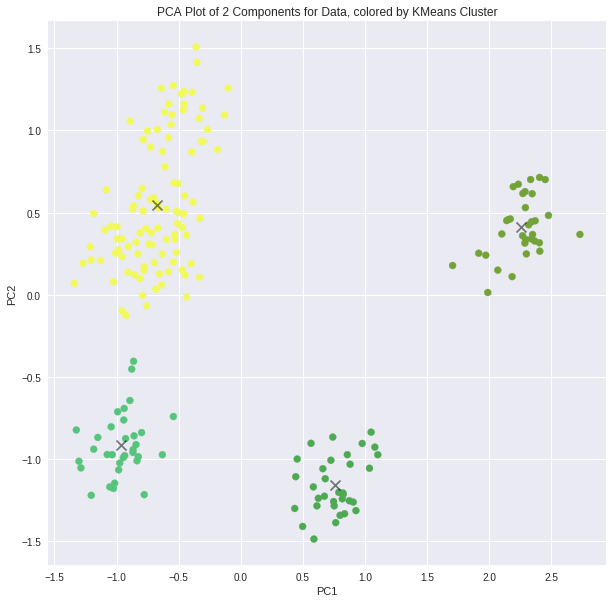

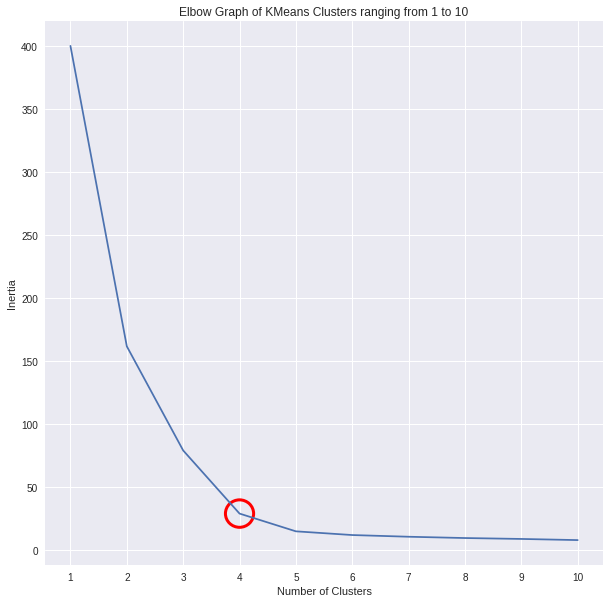

In [16]:
# Import module KMeans from scikit learn cluster module and random built-in module
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import random

# Scale data
numpy_scale = scale(numpy_points)

# Set-up for two component PCA
pca = PCA(2)

# Fit PCA to scaled data
pca.fit(numpy_scale)

# Transform each row of data to Principal Components
pca2 = pca.transform(numpy_scale)

# Find values, inertia, and cluster centers for kmeans cluster sizes between 1 and max_clusters(10)
max_clusters = 10
kmeans_sets = []
kmeans_scor = []
kmeans_clus = []
for clusters in range(1, max_clusters+2):
  kmeans = KMeans(n_clusters=clusters, random_state=0)
  kmeans.fit(pca2)
  kmeans_sets.append(kmeans.predict(pca2))
  kmeans_scor.append(kmeans.inertia_)
  kmeans_clus.append(kmeans.cluster_centers_)

# Determine "elbow" by taking second derivative of point and previous point using 
# equation: (m_(i,i+1) * m_(i-2, i-1)) / m_(i-1, i); wher m_(i,j) is slope between
# point i and point j. Them min of the second derivative is found to give the 
# best elbow point.
r = []
for i in range(max_clusters-2):
  r.append(((kmeans_scor[i+3] - kmeans_scor[i+2]) * (kmeans_scor[i+1] - kmeans_scor[i])) / ((kmeans_scor[i+2] - kmeans_scor[i+1])**2))
r_ind = r.index(min(r)) + 2
  
# Ouput kmeans cluster information for each cluster size
for i in range(max_clusters):
  s = ""
  if r_ind == i:
    s += "\033[1m"
  s += "{: 4d} Cluster(s) Inertia: {: 8.4f}\n".format(i+1, kmeans_scor[i])
  if i > 1:
    s += "\t 2nd Derivative: {: 8.3f}\n".format(r[i-2])
  s += "\t\tCenters:\n"
  for j in range(i+1):
    s += "\t\t{: 7d}: {:-8.4f}\t{:-8.4f}\n".format(j+1, kmeans_clus[i][j,0], kmeans_clus[i][j,1])
  if r_ind == i:
    s += "\033[0m"
  s += "\n"
  print(s)

# Determine which cluster each point belongs to
col = kmeans_sets[r_ind]

# Create random colors for each cluster
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(r_ind+1)]

# Display points described by Principal Components with color representing cluster
# for circular markers and centers for each cluster for "X" markers
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.scatter(pca2.T[0], pca2.T[1], color=[color[x] for x in col])
ax.scatter(kmeans_clus[r_ind].T[0], kmeans_clus[r_ind].T[1], color='black', alpha=0.5,s=100.0,marker="x")
ax.set_title("PCA Plot of 2 Components for Data, colored by KMeans Cluster")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Display elbow graph of kmeans inertias compared to number of clusters, with
# optimal kmeans cluster circled
fig2 = plt.figure(figsize=(10,10))
bx = fig2.add_subplot(111)
bx.plot(list(range(1,max_clusters+1)), kmeans_scor[:-1])
yl = bx.get_ylim()
xl = bx.get_xlim()
circle = Ellipse((r_ind+1, kmeans_scor[r_ind]), 0.5, 0.5*(yl[1]-yl[0])/(xl[1]-xl[0]), facecolor='none', edgecolor=(1, 0, 0), linewidth=3)
bx.add_patch(circle)
bx.set_title("Elbow Graph of KMeans Clusters ranging from 1 to 10")
bx.set_xlabel("Number of Clusters")
bx.set_ylabel("Inertia")
bx.set_xticks(list(range(1,max_clusters+1)))

plt.show()